<img src="http://bigdataexperience.org/BX/wp-content/uploads/2016/05/BX-FULL.png" width="200" height="200" alt="Big Data Experience Center, King Mongkut's University of Technology Thonburi">

# <center>Text Analytics</center>
# <center>Lecture 6 - Word Representation 2</center>
---

# 1. WordNet

In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\66885\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import wordnet as wn
poses = { 'n':'noun', 'v':'verb', 's':'adj (s)', 
          'a':'adj', 'r':'adv'}
for synset in wn.synsets("good"):
    print("{}: {}".format(poses[synset.pos()],
        ", ".join([l.name() for l in synset.lemmas()])))

noun: good
noun: good, goodness
noun: good, goodness
noun: commodity, trade_good, good
adj: good
adj (s): full, good
adj: good
adj (s): estimable, good, honorable, respectable
adj (s): beneficial, good
adj (s): good
adj (s): good, just, upright
adj (s): adept, expert, good, practiced, proficient, skillful, skilful
adj (s): good
adj (s): dear, good, near
adj (s): dependable, good, safe, secure
adj (s): good, right, ripe
adj (s): good, well
adj (s): effective, good, in_effect, in_force
adj (s): good
adj (s): good, serious
adj (s): good, sound
adj (s): good, salutary
adj (s): good, honest
adj (s): good, undecomposed, unspoiled, unspoilt
adj (s): good
adv: well, good
adv: thoroughly, soundly, good


In [3]:
from nltk.corpus import wordnet as wn
panda = wn.synset("panda.n.01")
hyper = lambda s: s.hypernyms()
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

# 2. Training SkipGram model

## 2.1 Load data

In [4]:
import pandas as pd
df = pd.read_csv('D:/Pum_Program/HDS_WORK/Year 3/Semester 1/Text analytics/Lecture6_lab/Lecture6_Lab/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df['Maker_Model']= df['Make']+ " " + df['Model']

In [6]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,Maker_Model
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,BMW 1 Series M
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,BMW 1 Series
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,BMW 1 Series
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,BMW 1 Series
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,BMW 1 Series


In [7]:
# Select features from original dataset to form a new dataframe 
df1 = df[['Engine Fuel Type','Transmission Type','Driven_Wheels','Market Category','Vehicle Size', 'Vehicle Style', 'Maker_Model']]
df1.head()

,Engine Fuel Type,Transmission Type,Driven_Wheels,Market Category,Vehicle Size,Vehicle Style,Maker_Model
0,premium unleaded (required),MANUAL,rear wheel drive,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,BMW 1 Series M
1,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Convertible,BMW 1 Series
2,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,High-Performance",Compact,Coupe,BMW 1 Series
3,premium unleaded (required),MANUAL,rear wheel drive,"Luxury,Performance",Compact,Coupe,BMW 1 Series
4,premium unleaded (required),MANUAL,rear wheel drive,Luxury,Compact,Convertible,BMW 1 Series


In [8]:
# For each row, combine all the columns into one column
df2 = df1.apply(lambda x: ','.join(x.astype(str)), axis=1)

df2.head()

0    premium unleaded (required),MANUAL,rear wheel ...
1    premium unleaded (required),MANUAL,rear wheel ...
2    premium unleaded (required),MANUAL,rear wheel ...
3    premium unleaded (required),MANUAL,rear wheel ...
4    premium unleaded (required),MANUAL,rear wheel ...
dtype: object

In [9]:
# Store them in a pandas dataframe
df_clean = pd.DataFrame({'clean': df2})
df_clean.head()

,clean
0,"premium unleaded (required),MANUAL,rear wheel ..."
1,"premium unleaded (required),MANUAL,rear wheel ..."
2,"premium unleaded (required),MANUAL,rear wheel ..."
3,"premium unleaded (required),MANUAL,rear wheel ..."
4,"premium unleaded (required),MANUAL,rear wheel ..."


In [10]:
# Create the list of list format of the custom corpus for gensim modeling 
sent = [row.split(',') for row in df_clean['clean']]
# show the example of list of list format of the custom corpus for gensim modeling 
sent[:2]

[['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Factory Tuner',
  'Luxury',
  'High-Performance',
  'Compact',
  'Coupe',
  'BMW 1 Series M'],
 ['premium unleaded (required)',
  'MANUAL',
  'rear wheel drive',
  'Luxury',
  'Performance',
  'Compact',
  'Convertible',
  'BMW 1 Series']]

## 2.2 Train Word2Vec model (skip-gram)

In [11]:
#!pip install gensim

In [12]:
from gensim.models import Word2Vec

In [13]:
model = Word2Vec(sent, min_count=1, vector_size= 300, workers=5, window=10, sg = 1, epochs=100)

**size**: The number of dimensions of the embeddings and the default is 100.

**window**: The maximum distance between a target word and words around the target word. The default window is 5.

**min_count**: The minimum count of words to consider when training the model; words with occurrence less than this count will be ignored. The default for min_count is 5.

**workers**: The number of partitions during training and the default workers is 3.

**sg**: The training algorithm, either CBOW(0) or skip gram(1). The default training algorithm is CBOW.

In [14]:
model.wv['Toyota Camry']

array([ 5.03506288e-02,  1.65065005e-01,  9.85634327e-02, -4.46448140e-02,
        3.05511728e-02, -2.73254037e-01,  2.29732823e-02,  2.96869725e-01,
       -1.94467634e-01, -1.54228389e-01,  2.21779346e-01, -1.73062950e-01,
        1.40511930e-01,  1.83775529e-01, -6.02832325e-02,  5.84000116e-03,
        2.74681658e-01,  8.50865990e-02, -2.39957437e-01,  3.83972749e-02,
       -1.92833200e-01, -4.94459532e-02, -1.46242037e-01,  1.68840572e-01,
       -1.74488619e-01, -1.05506085e-01, -1.74522966e-01,  1.50942370e-01,
       -1.59976885e-01, -1.87876552e-01,  4.17173445e-01,  4.45895381e-02,
       -1.81850761e-01, -7.99522698e-02, -3.48995961e-02, -1.15800723e-01,
        1.17283560e-01, -1.99166596e-01, -7.72713451e-03,  8.05374458e-02,
       -1.64225802e-01, -2.48577185e-02,  1.30296454e-01,  3.02661091e-01,
       -3.01210266e-02, -2.43813134e-04,  1.35076670e-02, -2.05297455e-01,
        1.73380971e-01,  1.70851558e-01,  1.45870835e-01, -1.76691458e-01,
        8.73596815e-04, -

## Similarity

In [15]:
model.wv.similarity('Porsche 718 Cayman', 'Nissan Van')

0.5669403

In [16]:
model.wv.similarity('Porsche 718 Cayman', 'Mercedes-Benz SLK-Class')

0.7933902

In [17]:
model.wv.most_similar('Mercedes-Benz SLK-Class')[:5]

[('Mercedes-Benz SL-Class', 0.9812448024749756),
 ('Cadillac XLR-V', 0.9672598838806152),
 ('Porsche Boxster', 0.9416688084602356),
 ('Mercedes-Benz SLC-Class', 0.9398273229598999),
 ('BMW Z4 M', 0.9221610426902771)]

<img src='https://miro.medium.com/max/1046/1*_Bf9goaALQrS_0XkBozEiQ.png'/>

In [18]:
import numpy as np
def cosine_distance (model, word,target_list , num) :
    cosine_dict ={}
    word_list = []
    a = model.wv[word] # -> model.wv['Mercedes-Benz SLK-Class'] ---> model.wv[word]
    for item in target_list :
        if item != word :
            b = model.wv[item]
            cos_sim = np.dot(a, b)/(np.linalg.norm(a)*np.linalg.norm(b))
            cosine_dict[item] = cos_sim
    dist_sort=sorted(cosine_dict.items(), key=lambda dist: dist[1],reverse = True) ## in Descedning order 
    for item in dist_sort:
        word_list.append((item[0], item[1]))
    return word_list[0:num]

In [19]:
model.wv['Mercedes-Benz SLK-Class']

array([-1.36562977e-02,  2.25442592e-02, -1.41776903e-02, -4.27659810e-01,
       -4.39091511e-02, -2.04699840e-02,  2.74255931e-01,  7.35646486e-02,
        2.16505393e-01, -3.03471446e-01,  9.55587402e-02, -1.34819262e-02,
        2.90077534e-02, -1.35770053e-01, -2.93594059e-02, -1.84146807e-01,
        1.52837604e-01,  1.15058415e-01, -5.72715923e-02,  1.31878287e-01,
        4.88395691e-02,  1.29543096e-01, -1.17767870e-01,  2.63057768e-01,
       -3.62612568e-02, -3.01302850e-01, -2.04289183e-01, -9.74979401e-02,
        6.83883205e-02, -2.64300525e-01,  1.27710747e-02, -9.30099040e-02,
        6.33341670e-02, -4.85987999e-02, -1.58753321e-02, -2.19540298e-01,
        1.68200314e-01,  2.35765912e-02,  1.56696931e-01, -1.52565837e-01,
        8.72415602e-02,  1.32180080e-01, -3.21507715e-02, -3.14572066e-01,
        3.44510108e-01,  2.14798301e-01,  9.05429870e-02,  1.31958157e-01,
        4.46543843e-01, -5.94868287e-02,  1.87786631e-02, -4.87643242e-01,
       -1.29597619e-01,  

In [20]:
# only get the unique Maker_Model
Maker_Model = list(df.Maker_Model.unique()) 
# Show the most similar Mercedes-Benz SLK-Class by cosine distance 
cosine_distance(model,'Mercedes-Benz SLK-Class',Maker_Model,5)

[('Mercedes-Benz SL-Class', 0.9812448),
 ('Cadillac XLR-V', 0.9672598),
 ('Porsche Boxster', 0.9416687),
 ('Mercedes-Benz SLC-Class', 0.9398273),
 ('BMW Z4 M', 0.92216104)]

In [21]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word) #--> model.wv.similar_by_word
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

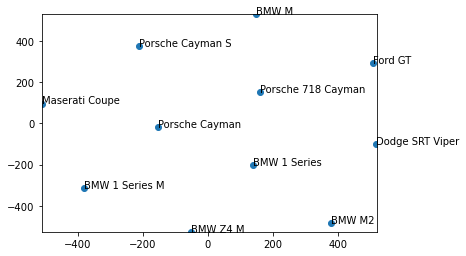

In [22]:
display_closestwords_tsnescatterplot(model, 'Porsche 718 Cayman') 

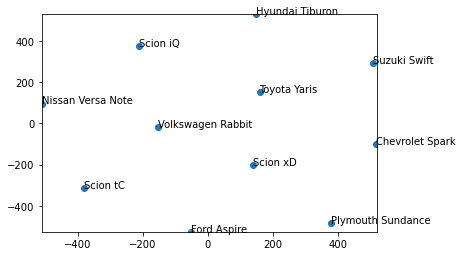

In [23]:
display_closestwords_tsnescatterplot(model, 'Toyota Yaris') 

In [24]:
model.wv['Toyota Camry']

array([ 0.05035063,  0.165065  ,  0.09856343, -0.04464481,  0.03055117,
       -0.27325404,  0.02297328,  0.29686972, -0.19446763, -0.15422839,
        0.22177935, -0.17306295,  0.14051193,  0.18377553, -0.06028323,
        0.00584   ,  0.27468166,  0.0850866 , -0.23995744,  0.03839727,
       -0.1928332 , -0.04944595, -0.14624204,  0.16884057, -0.17448862,
       -0.10550608, -0.17452297,  0.15094237, -0.15997688, -0.18787655,
        0.41717345,  0.04458954, -0.18185076, -0.07995227, -0.0348996 ,
       -0.11580072,  0.11728356, -0.1991666 , -0.00772713,  0.08053745,
       -0.1642258 , -0.02485772,  0.13029645,  0.3026611 , -0.03012103,
       -0.00024381,  0.01350767, -0.20529746,  0.17338097,  0.17085156,
        0.14587083, -0.17669146,  0.0008736 , -0.07823745, -0.04369223,
        0.00822223, -0.00877175, -0.04908975, -0.00684395,  0.13821046,
        0.10102902,  0.12644917,  0.10893636,  0.2469037 , -0.17927268,
       -0.01176028,  0.21566473,  0.03961034, -0.14348687,  0.33

In [25]:
x = model.wv['Toyota Yaris']
y = model.wv['Hatchback']
z = model.wv['Regular Cab Pickup']
model.wv.most_similar(positive=(x-y+z,))

[('Regular Cab Pickup', 0.788172721862793),
 ('Extended Cab Pickup', 0.7330517768859863),
 ('Toyota Sequoia', 0.6366194486618042),
 ('GMC Envoy XL', 0.6311871409416199),
 ('Chevrolet TrailBlazer EXT', 0.6282130479812622),
 ('Ford Expedition', 0.6278671026229858),
 ('Nissan Armada', 0.6274278163909912),
 ('GMC Envoy XUV', 0.6217577457427979),
 ('GMC Suburban', 0.6126042008399963),
 ('Oldsmobile Eighty-Eight Royale', 0.601077139377594)]

# Activity

1. Use the customer complaint data to estimate the word embedding vectors
2. Find similar words to 'debt', 'collection', 'risk'
3. Plot the closest word using TSNE of the words in (2).

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
complaint_data = pd.read_pickle("D:/Pum_Program/HDS_WORK/Year 3/Semester 1/Text analytics/Lecture6_lab/data/consumer_complaint_dataset.data")

In [27]:
complaint_data.head()

,topic,input
0,Debt collection,transworld systems inc. \nis trying to collect...
1,"Credit reporting, credit repair services, or o...",I would like to request the suppression of the...
2,Debt collection,"Over the past 2 weeks, I have been receiving e..."
3,"Credit reporting, credit repair services, or o...",I HAD FILED WITH CFPB ON XX/XX/XXXX19 TO HAVE ...
4,"Credit reporting, credit repair services, or o...",I have several accounts that the balance is in...


In [28]:
complaint_data["data"] = complaint_data["topic"] + complaint_data["input"]

In [29]:
complaint_customer = complaint_data["data"]

In [30]:
complaint = [data.split() for data in complaint_customer]

In [32]:
model_1 = Word2Vec(complaint, min_count=1, vector_size=300, workers=5, window=10, sg = 1, epochs=2)

In [33]:
model_1.wv.most_similar('debt')[:5]

[('debt.', 0.8007758855819702),
 ('debt,', 0.7637102603912354),
 ('debt-', 0.7612301111221313),
 ('debts', 0.736707866191864),
 ('debt..', 0.7271795868873596)]

In [34]:
model_1.wv.most_similar('collection')[:5]

[('collections', 0.8124154806137085),
 ('collection.', 0.7077081799507141),
 ('colection', 0.6644518971443176),
 ('Hunter-Warfield', 0.6627241969108582),
 ('Convergence', 0.6586585640907288)]

In [35]:
model_1.wv.most_similar('risk')[:5]

[('risk,', 0.7304035425186157),
 ('reputational', 0.6442158222198486),
 ('risk.', 0.6239709258079529),
 ('exposure', 0.6220661997795105),
 ('theft/fraud', 0.6087296009063721)]

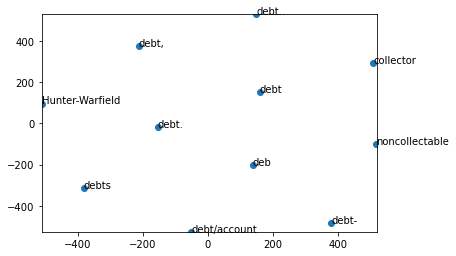

In [36]:
display_closestwords_tsnescatterplot(model_1, 'debt') 

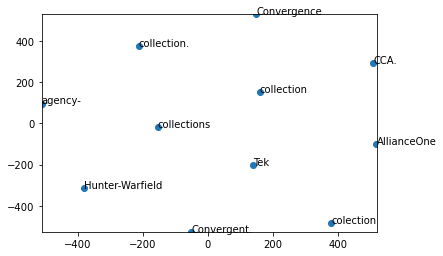

In [37]:
display_closestwords_tsnescatterplot(model_1, 'collection') 

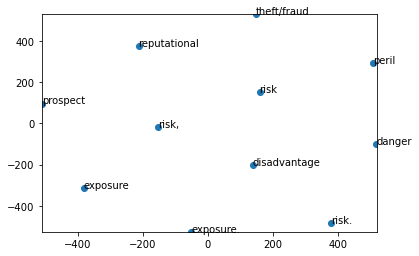

In [38]:
display_closestwords_tsnescatterplot(model_1, 'risk') 